# K - means 

In [26]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:, 0], X[:, 1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)

df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


Text(0.5, 1.0, 'Original data')

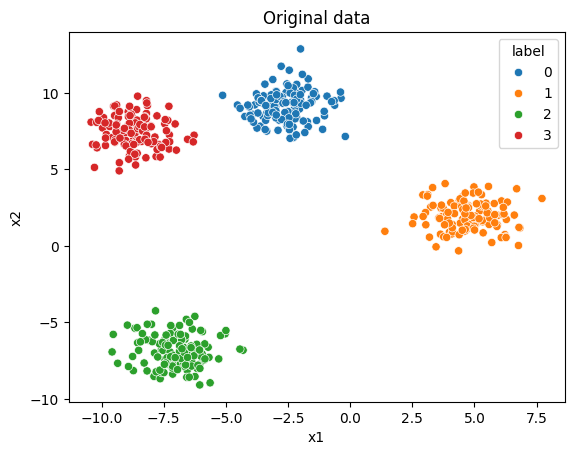

In [27]:
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="tab10")
plt.title("Original data")

In [28]:
X = df.drop("label", axis=1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]


array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

Text(0.5, 1.0, 'Scaled X with feature standardization - no labels')

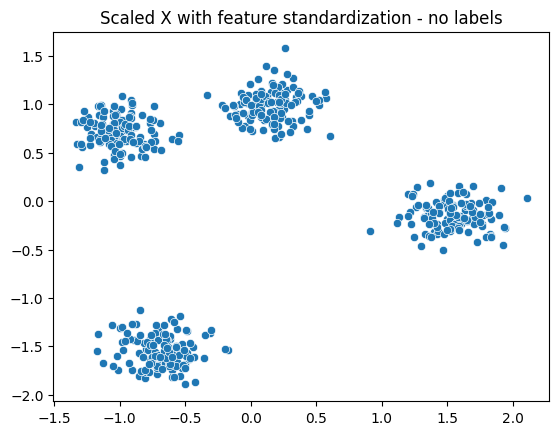

In [30]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization - no labels")


In [31]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distance = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]

sum_squared_distance

[1000.0000000000002,
 522.1570539287742,
 116.09567852755528,
 28.786938978874026,
 26.100886008674543,
 23.240715018550222,
 20.91629630071582,
 19.516367795140134,
 16.765004930970203]

Text(0.5, 1.0, 'Elbow plot to find k')

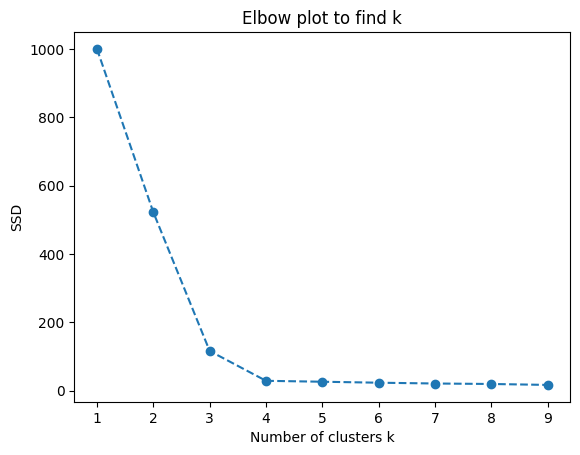

In [32]:
plt.plot(clusters, sum_squared_distance, "--o")
plt.xlabel("Number of clusters k")
plt.ylabel("SSD")
plt.title("Elbow plot to find k")

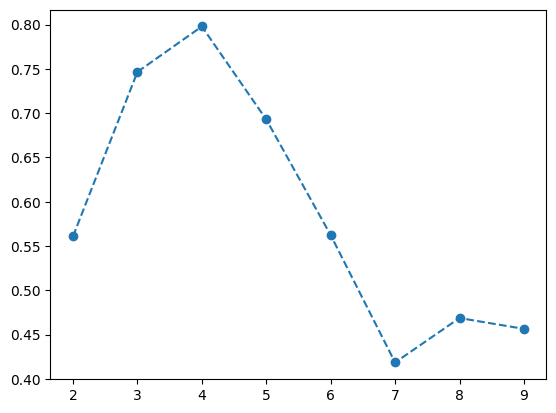

In [33]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init="auto").fit(scaled_X) for k in clusters]

silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
plt.plot(clusters[1:], silhouette_scores, "--o")

# Vizual

In [34]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])
df_plot.head()

,x1,x2
0,-0.815393,0.589390
1,-1.173444,-1.553288
2,1.938811,-0.272989
3,0.092842,0.736467
4,-0.433975,-1.609212


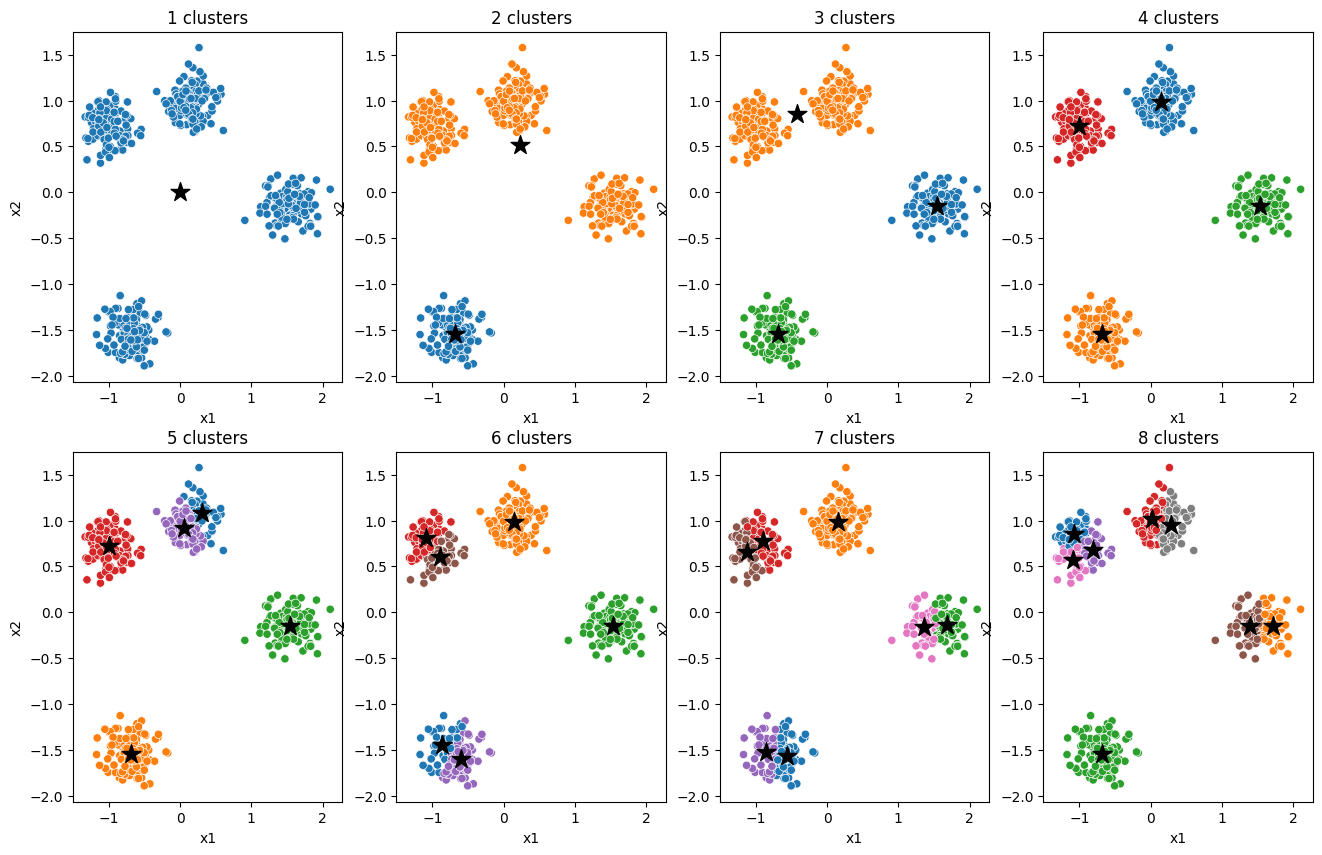

In [35]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2", hue="label", ax=ax, palette="tab10")
    ax.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker="*", color="black"
    )

    ax.legend([], [], frameon=False)

    ax.set(title = f"{i+1} clusters")
